In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
df.size

6912

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.isnull().values.any()

False

In [10]:
corrMtrix  = df.corr()

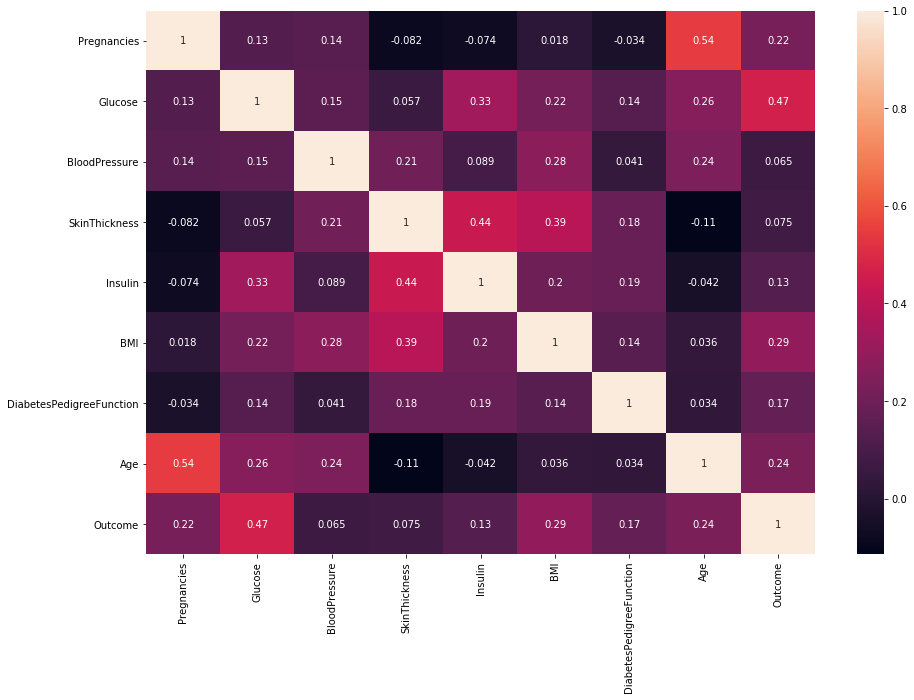

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(corrMtrix,annot=True)
plt.show()

# DATA VISUALIZATION

In [12]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

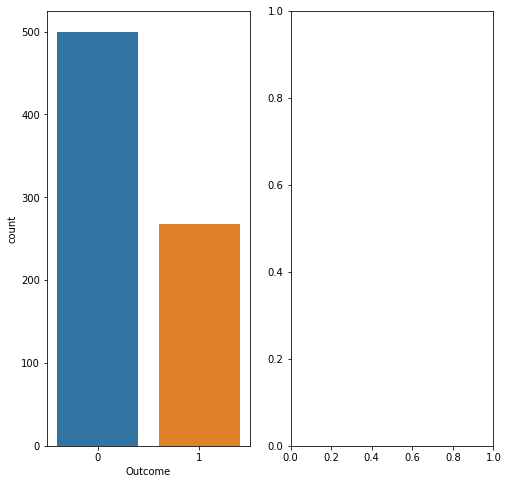

In [13]:
#plotting the frequency of outcome
ax0,ax1=plt.subplots(1,2,figsize=(8,8))
#count of observations in each category using bars
sns.countplot(df['Outcome'],ax=ax1[0])

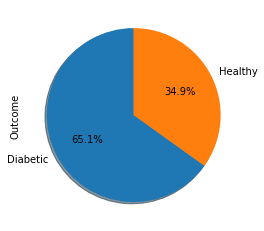

In [14]:
#% of diabetic and healthy person
label='Diabetic','Healthy'
df.Outcome.value_counts().plot.pie(labels=label,autopct='%1.1f%%',shadow=True,startangle=90)

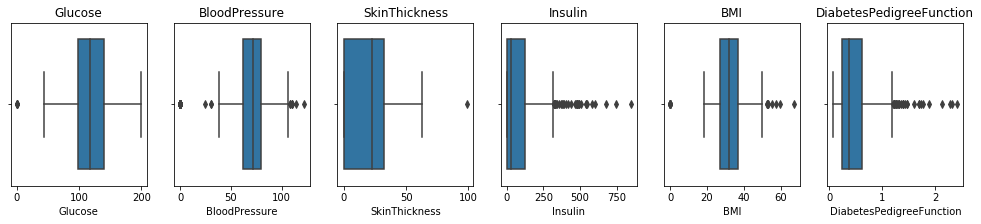

In [15]:
#Visualizing Outliners
fig=plt.figure(figsize=(20,3))
for i in np.arange(1,7):
    data=plt.subplot(1,7,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

In [16]:
#it is seen that blood pressure,insulin,and BMI has got outliners

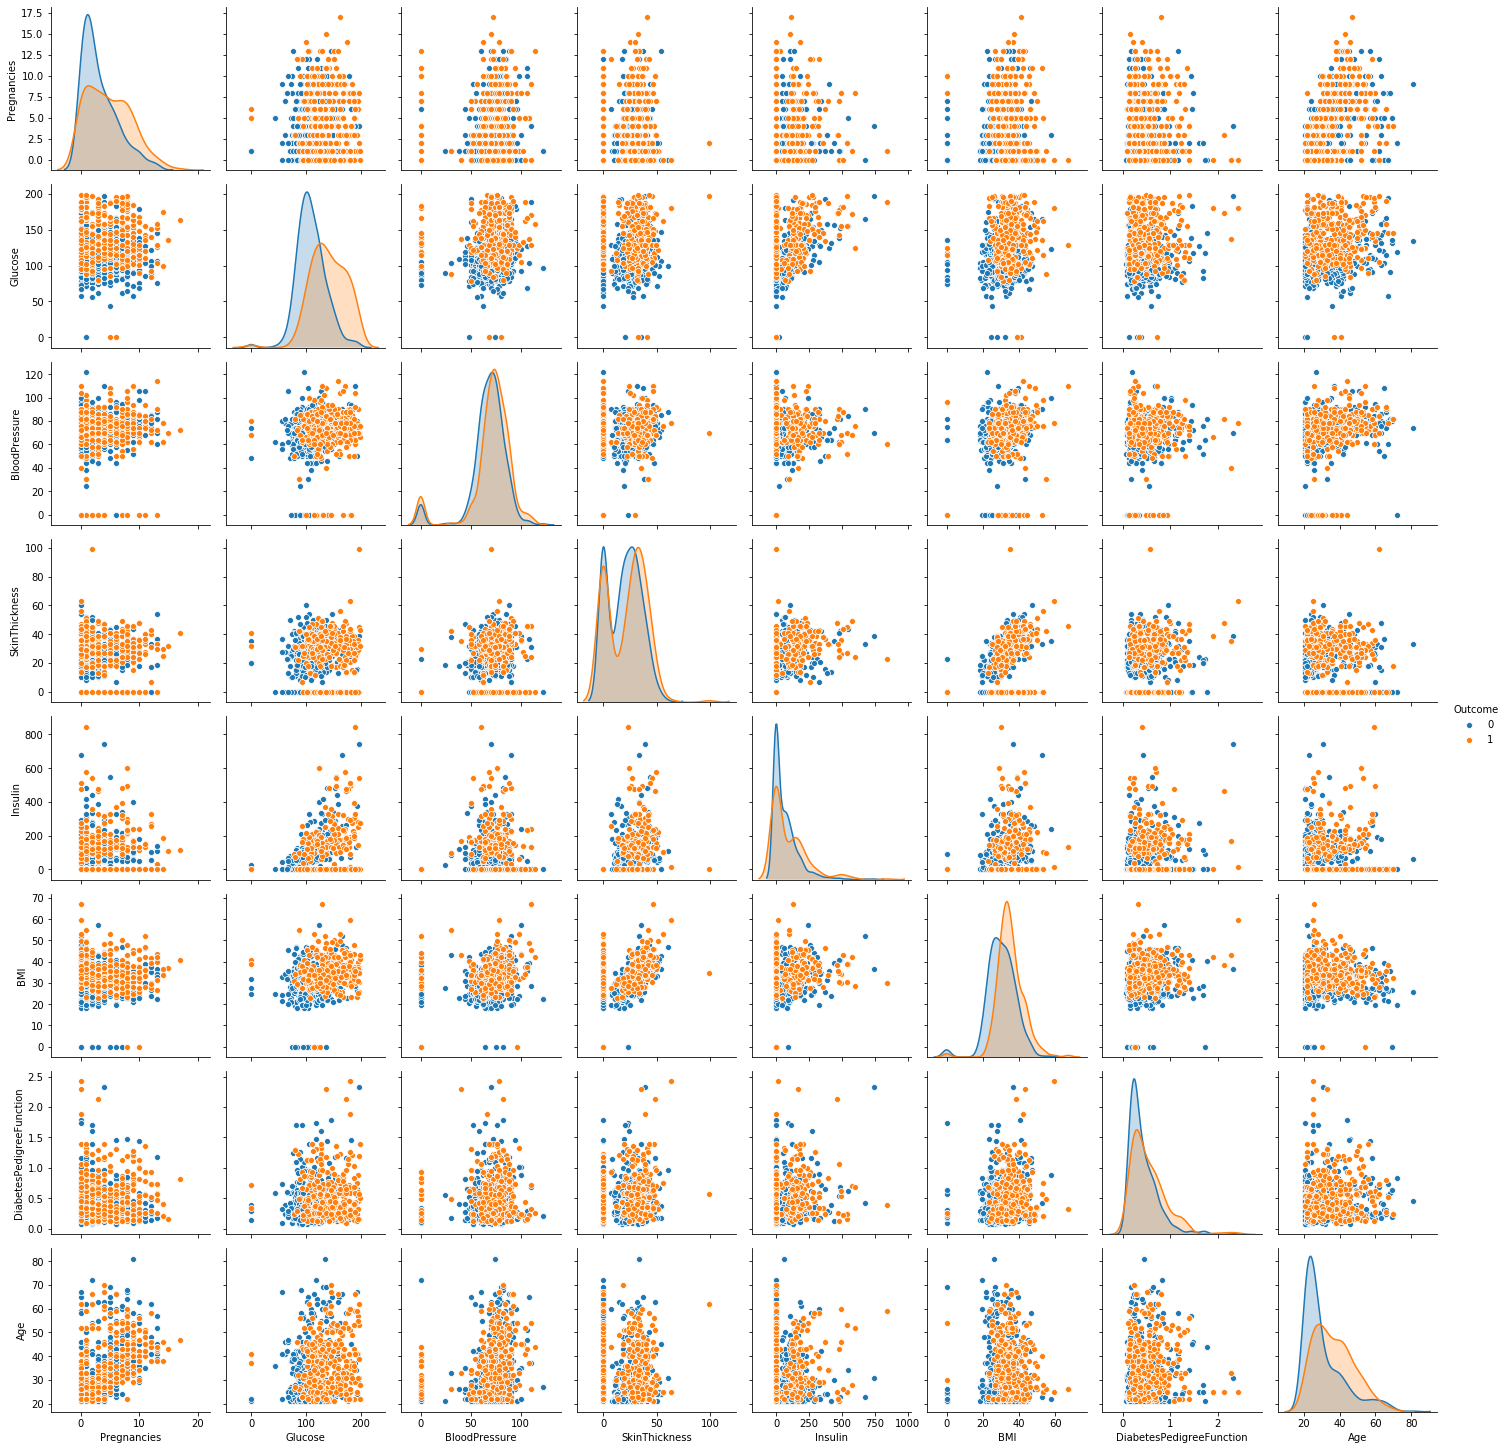

In [17]:
sns.pairplot(df,hue='Outcome')

In [18]:
correlation=df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
#Analysis of parameters against Outcome

In [21]:
#analysis of 'age' against outcome
a=pd.Series([])
for i in df.index:
    if(df.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(df.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(df.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(df.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
df['Age']=a
df.head()

#Find the number of diabetic person in each age group

data1=df[df['Outcome']==1].groupby('Age')[['Outcome']].count()
data1
data1.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Outcome
Age,
21-24,31
25-30,59
31-40,76
41-55,85
>55,17


In [22]:
data2=df.groupby('Age')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1

,Outcome,Diabetic %
Age,,
21-24,31,14.155251
25-30,59,29.797980
31-40,76,48.407643
41-55,85,59.027778
>55,17,34.000000


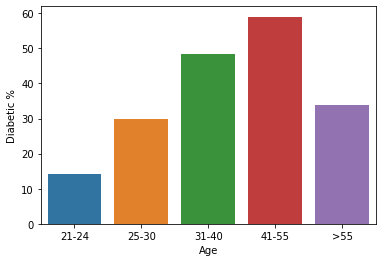

In [23]:
sns.barplot(data1.index,data1['Diabetic %'])

In [24]:
#Analysis of 'Pregnancies' parameter
pd.crosstab(df['Pregnancies'],df['Outcome'])


Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


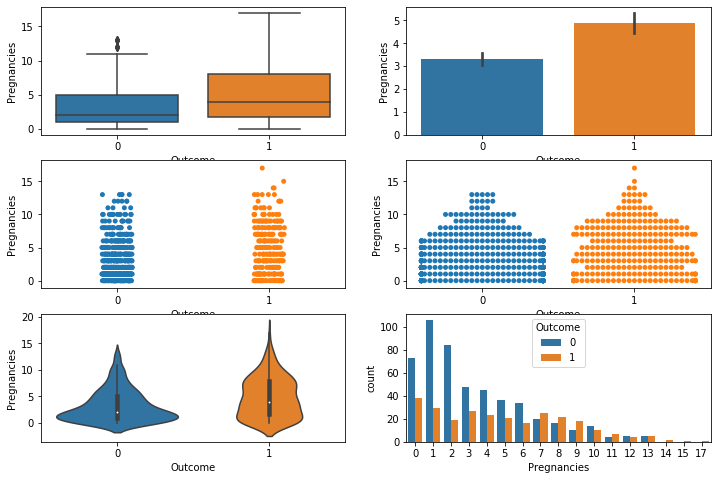

In [25]:
fig, ax2 = plt.subplots(3, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Pregnancies", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Pregnancies'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Pregnancies'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Pregnancies'], ax=ax2[1][1])
sns.violinplot(df['Outcome'], df['Pregnancies'], ax=ax2[2][0])
sns.countplot(x='Pregnancies',hue='Outcome',data=df,ax=ax2[2][1])

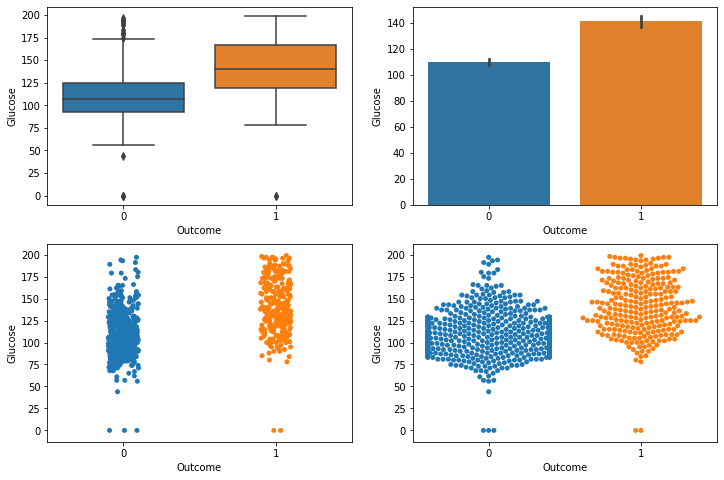

In [26]:
#Analysis of 'Glucose' parameter

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Glucose", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Glucose'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Glucose'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Glucose'], ax=ax2[1][1])

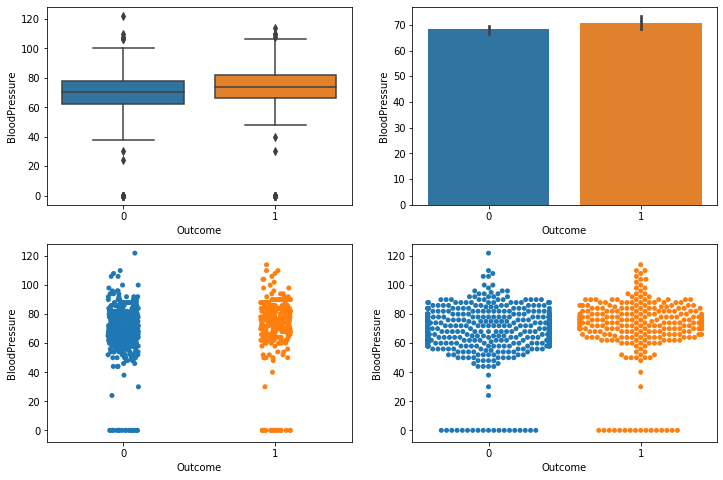

In [27]:
#Analysis of 'BloodPressure' parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BloodPressure", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['BloodPressure'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['BloodPressure'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['BloodPressure'], ax=ax2[1][1])

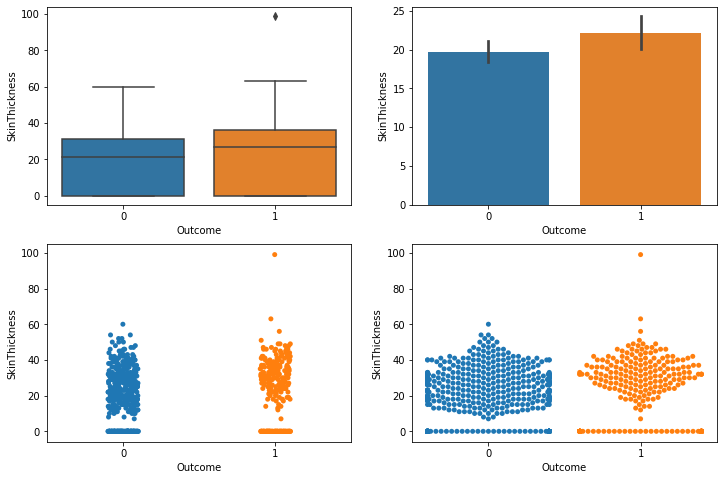

In [28]:
#Analysis of 'SkinThickness' parameter
 

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="SkinThickness", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['SkinThickness'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['SkinThickness'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['SkinThickness'], ax=ax2[1][1])

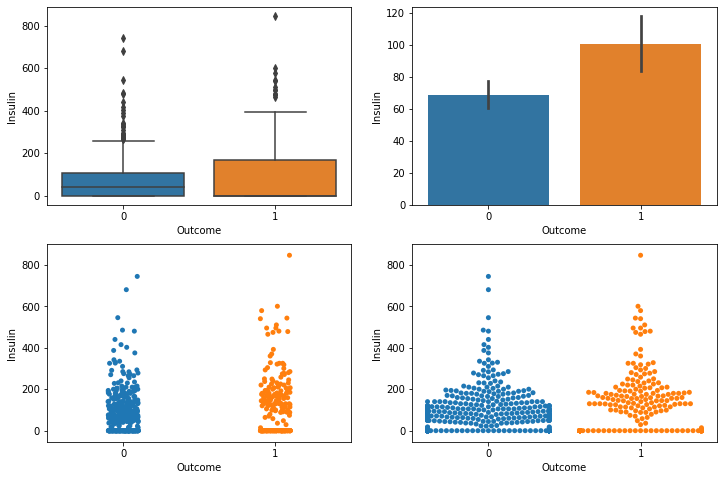

In [29]:
#Analysis of 'Insulin' parameter
 

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Insulin", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Insulin'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Insulin'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Insulin'], ax=ax2[1][1])

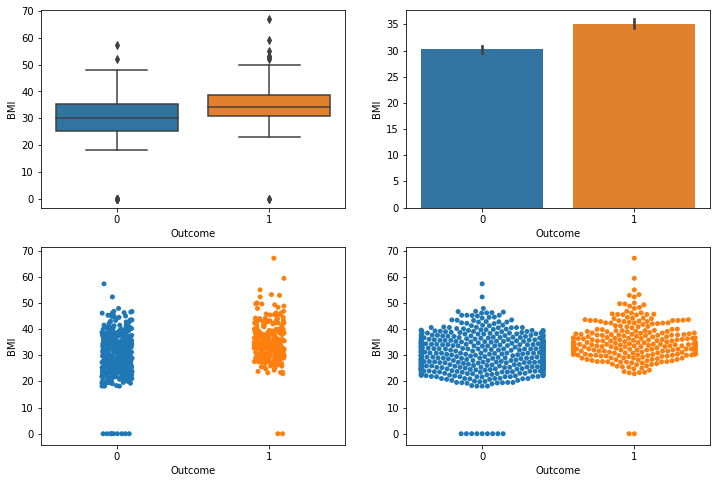

In [30]:
#Analysis of 'BMI' parameter


fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BMI", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['BMI'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['BMI'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['BMI'], ax=ax2[1][1])

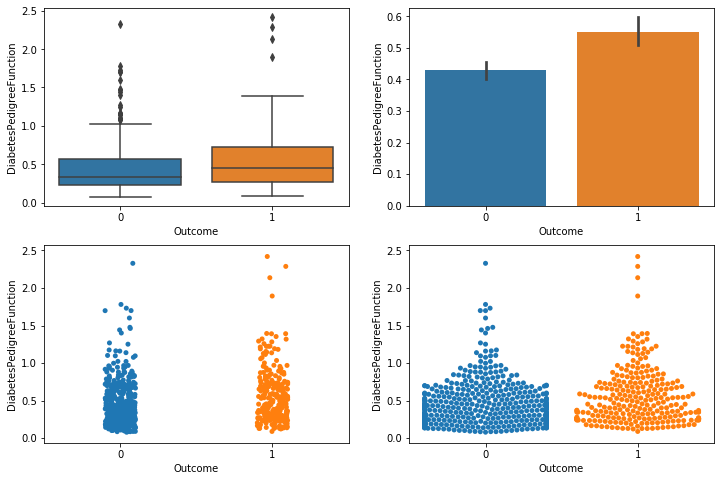

In [31]:
#Analysis of 'DiabetesPedigreeFunction' parameter


fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['DiabetesPedigreeFunction'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['DiabetesPedigreeFunction'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['DiabetesPedigreeFunction'], ax=ax2[1][1])